# Using R from Python


While Python is a general-purpose language, R specialized in statistics computing. Some of the packages in R may not already be in Python. It is possible to execute R code directly in Jupyter notebook (or IPython) via the `rpy2` package.


Requirements:

* Install R on your computer (e.g. http://cran.stat.ucla.edu/ or other mirror sites)
* Install `rpy2`, e.g.
```
conda install -c r rpy2 
```
* Use
```
%load_ext rpy2.ipython
```

In Jupyter notebook cell:
* For single-line R code, use `%R`.
* For a cell of R code, use `%%R`.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Load data from csv file:

In [2]:
data = pd.read_csv('data/longley.csv')

Enable the rpy2.ipython magic:

In [3]:
%load_ext rpy2.ipython

In [4]:
data.columns

Index(['TOTEMP', 'GNPDEFL', 'GNP', 'UNEMP', 'ARMED', 'POP', 'YEAR'], dtype='object')

In [5]:
data.head()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,60323.0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,61122.0,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,60171.0,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,61187.0,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,63221.0,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


In [6]:
x = data['GNP']
y = data['TOTEMP']

Use `%R -i` to pass data from Python to R. Use `%R -o` to pass data from R to Python.

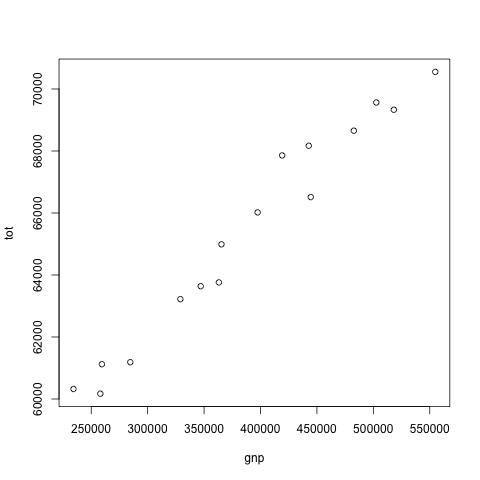

In [7]:
gnp = x
tot = y
%R -i tot,gnp plot (gnp, tot)   # pass data from Python to R

 (Intercept)          gnp 
5.184359e+04 3.475229e-02 


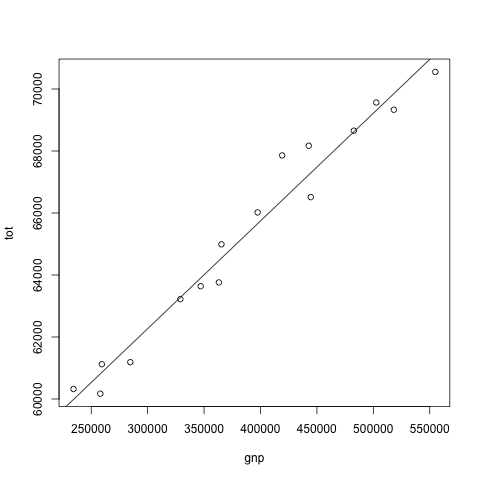

In [8]:
%%R
fit <- lm(tot ~ gnp);
print(fit$coefficients)
plot(gnp, tot)
abline(fit)

coeff = fit$coefficients

Pass data "coeff" from R to Python:

In [9]:
%R -o coeff
coeff

array([  5.18435898e+04,   3.47522943e-02])

Now we can plot the same data in Python...

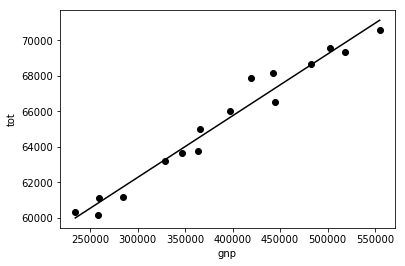

In [10]:

plt.plot(gnp, tot, 'ko')
x = np.linspace(gnp.min(), gnp.max(), 100)
y = coeff[0] + coeff[1]*x
plt.plot(x,y,'k-')
plt.xlabel('gnp')
plt.ylabel('tot')